<h1>WGU D212 TASK 2 REV 6 - MATTINSON</h1>
PCA or General Factor Analysis

## Setup data using continuous features

Import required libraries to get started

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read dataset from .csv file

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#churn = pd.read_csv('data/churn_clean.csv')

Define continuous features

Create a dataframe of the churn data with numerical values (continuous variables)

In [12]:
#df = pd.DataFrame(churn,columns=features)
features = cancer['feature_names']
df = pd.DataFrame(cancer['data'], columns=features)

Explore dataframe

In [13]:
# explore data
print(df.head().round(3).T)
print(df.info())

                                0         1         2        3         4
mean radius                17.990    20.570    19.690   11.420    20.290
mean texture               10.380    17.770    21.250   20.380    14.340
mean perimeter            122.800   132.900   130.000   77.580   135.100
mean area                1001.000  1326.000  1203.000  386.100  1297.000
mean smoothness             0.118     0.085     0.110    0.142     0.100
mean compactness            0.278     0.079     0.160    0.284     0.133
mean concavity              0.300     0.087     0.197    0.241     0.198
mean concave points         0.147     0.070     0.128    0.105     0.104
mean symmetry               0.242     0.181     0.207    0.260     0.181
mean fractal dimension      0.079     0.057     0.060    0.097     0.059
radius error                1.095     0.544     0.746    0.496     0.757
texture error               0.905     0.734     0.787    1.156     0.781
perimeter error             8.589     3.398     4.5

## Scale the data

import standard scaler to ensure each variable contributes equally to the analysis

In [6]:
from sklearn.preprocessing import StandardScaler

scale data to ensure each variable contributes equally to the analysis

In [7]:
scaler = StandardScaler()

fit scaler to the data

In [8]:
scaler.fit(df)

StandardScaler()

create scaled dataframe using transformed data

In [14]:
scaled_df = pd.DataFrame(scaler.transform(df), columns = features)
print(scaled_df.head().round(3).T)
print(scaled_df.info())

                             0      1      2      3      4
mean radius              1.097  1.830  1.580 -0.769  1.750
mean texture            -2.073 -0.354  0.456  0.254 -1.152
mean perimeter           1.270  1.686  1.567 -0.593  1.777
mean area                0.984  1.909  1.559 -0.764  1.826
mean smoothness          1.568 -0.827  0.942  3.284  0.280
mean compactness         3.284 -0.487  1.053  3.403  0.539
mean concavity           2.653 -0.024  1.363  1.916  1.371
mean concave points      2.532  0.548  2.037  1.452  1.428
mean symmetry            2.218  0.001  0.940  2.867 -0.010
mean fractal dimension   2.256 -0.869 -0.398  4.911 -0.562
radius error             2.490  0.499  1.229  0.326  1.271
texture error           -0.565 -0.876 -0.780 -0.110 -0.790
perimeter error          2.833  0.263  0.851  0.287  1.273
area error               2.488  0.742  1.181 -0.288  1.190
smoothness error        -0.214 -0.605 -0.297  0.690  1.483
compactness error        1.317 -0.693  0.815  2.744 -0.0

export scaled data to .CSV file

In [15]:
scaled_df.to_csv('tables\scaled_df_cancer.csv', index=False, header=True)

import PCA from sklearn

In [16]:
from sklearn.decomposition import PCA

fit PCA to scaled data

In [17]:
pca = PCA().fit(scaled_df)

Visualize Scree Plot

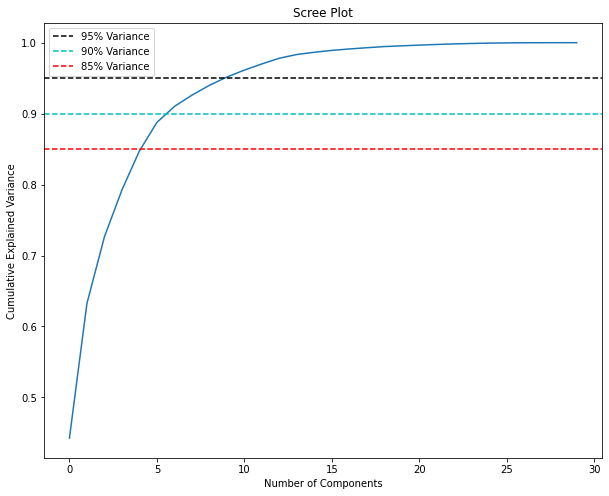

In [18]:
# create scree plot
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.show()

## Principal Component Algorithm

In [40]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_df)

In [41]:
print('Numpy covariance matrix: \n%s' %np.cov(x_pca.T).round(3))

Numpy covariance matrix: 
[[13.305 -0.    -0.   ]
 [-0.     5.701  0.   ]
 [-0.     0.     2.823]]


In [42]:
scaled_df.shape

(569, 30)

In [43]:
x_pca.shape

(569, 3)

In [44]:
print((pca.explained_variance_ratio_*100).round(3))
print((np.cumsum(pca.explained_variance_ratio_*100).round(3)))

[44.272 18.971  9.393]
[44.272 63.243 72.636]


In [45]:
print('Variance explained by principal components = ', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by principal components =  72.636


In [46]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

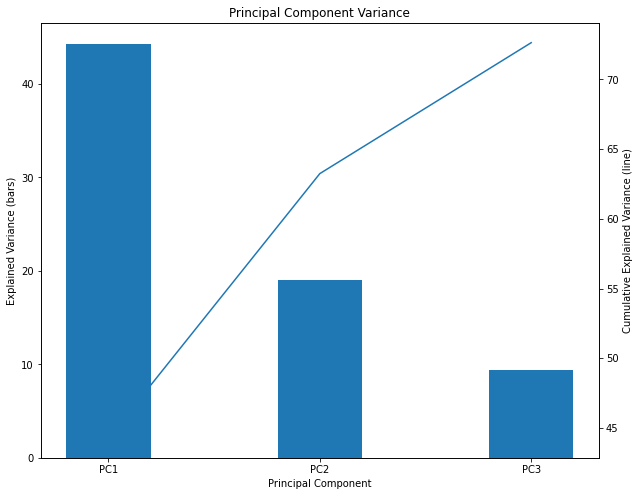

In [47]:
# create principal component variance
#plt.figure(figsize=(10,8))
x = range(1,len(per_var)+1)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.bar(x, height=per_var, width=0.4, align='center', tick_label=pc_labels)
ax2 = ax1.twinx()
ax2.plot(x, np.cumsum(pca.explained_variance_ratio_*100).round(3))
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (bars)')
ax1.set_title('Principal Component Variance')
ax2.set_ylabel('Cumulative Explained Variance (line)')
plt.show()

## Two-dimensions captured 26.90% of variability

In [48]:
print('Variance explained by the first principal component = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[0])
print('Variance explained by the second principal component = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[1])

Variance explained by the first principal component =  44.272025607526416
Variance explained by the second principal component =  63.243207651559416


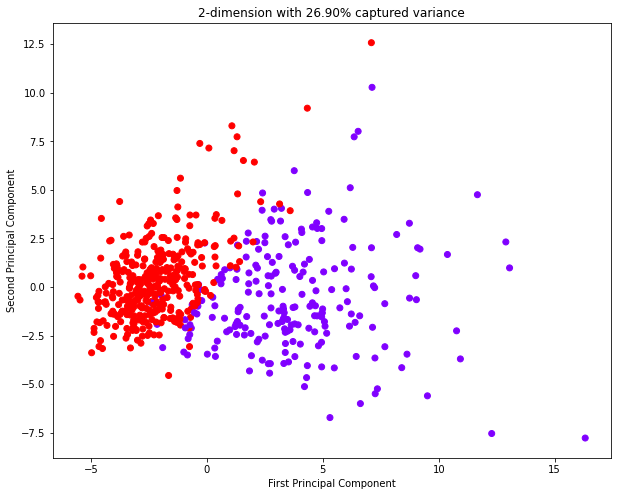

In [49]:
target = cancer['target']
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=target, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2-dimension with 26.90% captured variance')
plt.show()

In [50]:
pca.components_.round(3)

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275],
       [-0.009,  0.065, -0.009,  0.029, -0.104, -0.074,  0.003, -0.026,
        -0.04 , -0.023,  0.268,  0.375,  0.267,  0.216,  0.309,  0.155,
         0.176,  0.225,  0.289,  0.212, -0.048, -0.042, -0.049, -0.012,
        -0.26 , -0.236, -0.173, -0.17 , -0.271, -0.233]])

Create a dataframe of PCs and relationship to the original features

In [51]:
# create pc labels
pc_labels =[]
for i in range(1,len(per_var)+1):
    pc_labels.append('PC'+str(i))

In [52]:
pca_comp = pd.DataFrame(pca.components_,
                columns=features,index=pc_labels)
pca_comp.round(4).T

,PC1,PC2,PC3
mean radius,0.2189,-0.2339,-0.0085
mean texture,0.1037,-0.0597,0.0646
mean perimeter,0.2275,-0.2152,-0.0093
mean area,0.2210,-0.2311,0.0287
mean smoothness,0.1426,0.1861,-0.1043
mean compactness,0.2393,0.1519,-0.0741
mean concavity,0.2584,0.0602,0.0027
mean concave points,0.2609,-0.0348,-0.0256
mean symmetry,0.1382,0.1903,-0.0402
mean fractal dimension,0.0644,0.3666,-0.0226


Text(0.5, 1.0, 'Principal Component Matrix')

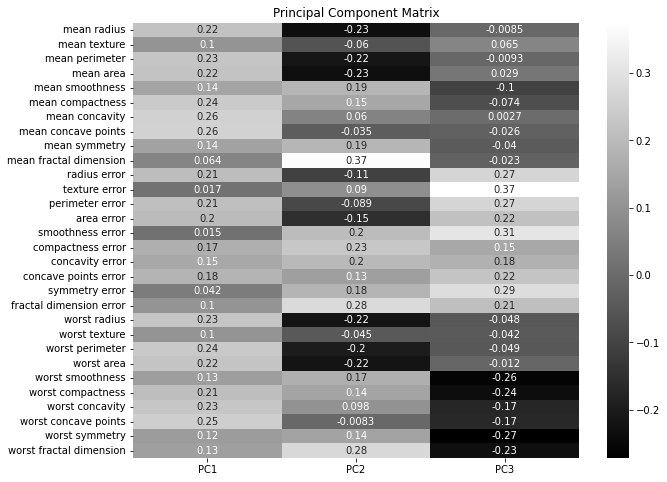

In [63]:
# create principal component matrix
plt.figure(figsize=(10,8))

sns.heatmap(pca_comp.T,cmap='gray',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')



In [ ]:
# create principal component matrix
plt.figure(figsize=(10,8))
sns.heatmap(pca_comp.T,cmap='rainbow',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')

In [54]:
# https://stackoverflow.com/questions/40721260/how-to-use-robust-pca-output-as-principal-component-eigenvectors-from-traditio

def pca(data, numComponents=None):
    """Principal Components Analysis

    From: http://stackoverflow.com/a/13224592/834250

    Parameters
    ----------
    data : `numpy.ndarray`
        numpy array of data to analyse
    numComponents : `int`
        number of principal components to use

    Returns
    -------
    comps : `numpy.ndarray`
        Principal components
    evals : `numpy.ndarray`
        Eigenvalues
    evecs : `numpy.ndarray`
        Eigenvectors
    """
    m, n = data.shape
    data -= data.mean(axis=0)
    R = np.cov(data, rowvar=False)
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial
    evals, evecs = np.linalg.eigh(R)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    if numComponents is not None:
        evecs = evecs[:, :numComponents]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T, evals, evecs

In [39]:
pca(scaled_df, numComponents=2)

(array([[ -9.19283683,  -1.94858307],
        [ -2.3878018 ,   3.76817174],
        [ -5.73389628,   1.0751738 ],
        ...,
        [ -1.25617928,   1.90229671],
        [-10.37479406,  -1.67201011],
        [  5.4752433 ,   0.67063679]]),
 array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
        1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
        4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
        2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
        5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
        3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
        1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
        7.50121413e-04, 1.33279057e-04]),
 array([[-0.21890244,  0.23385713],
        [-0.10372458,  0.05970609],
        [-0.22753729,  0.21518136],
        [-0.22099499,  0.23107671],
        [-0.14258969, -0.18611302],
        [-0.23928535, -0.151891

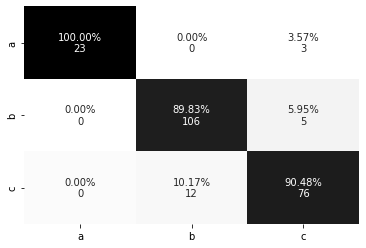

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cf = np.array([[23, 0, 3],
               [0, 106, 5],
               [0, 12, 76]])

categories = ['a', 'b', 'c']
group_percentages = []
counts = []
for i in range(len(cf)):
    for j in range(len(cf)):
        group_percentages.append(cf[j, i]/np.sum(cf[:, i]))
        counts.append(cf[j, i])

percentages_matrix = np.reshape(group_percentages, (3, 3))
group_percentages = ['{0:.2%}'.format(value) for value in group_percentages]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_percentages, counts)]
labels = np.asarray(labels).reshape(3, 3, order = 'F')

sns.heatmap(percentages_matrix, annot = labels, fmt = '', xticklabels = categories, yticklabels = categories, cmap = 'Greys', vmax = 1, vmin = 0, cbar = False)

plt.show()

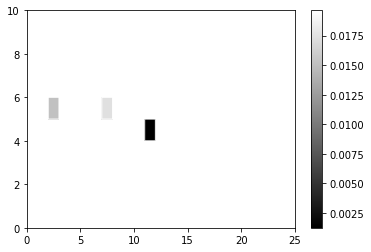

In [61]:
import numpy as np
from pylab import *

z = rand(10, 25)
z = np.ma.masked_array(z,mask=z>0.02)

c = pcolor(z)
set_cmap('gray')
colorbar()
c = pcolor(z, edgecolors='w', linewidths=1)
axis([0,25,0,10])
savefig('plt.png')
show()

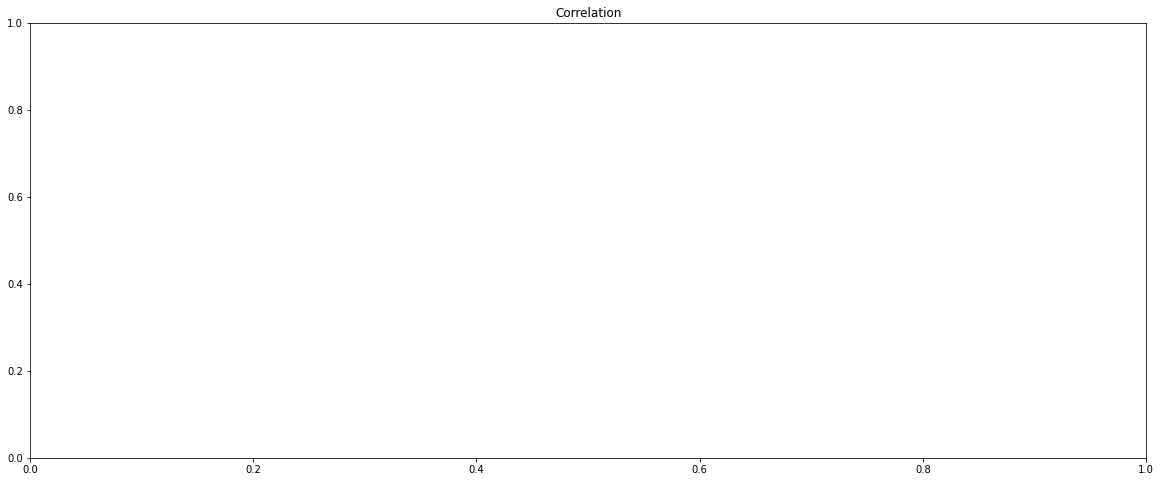

In [65]:
# seaborn heatmap best parameter
corr = scaled_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r', ax=ax1,  # ax: use this when using subplot
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9)) # cbar_kws: for positioning cbar and "shrink" for reducing cbar size
plt.title('Correlation')
plt.show()

<AxesSubplot:>

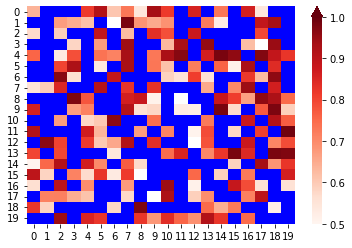

In [82]:
matrix = np.random.default_rng(0).random(size=(20, 20))
mask_threshold = .99
cmap = plt.cm.get_cmap('Reds').copy()
cmap.set_bad('white')      # color of mask on heatmap
cmap.set_under('blue')    # color of mask on cbar

sns.heatmap(matrix,
    cmap=cmap, vmin=0.5, vmax=1,  # set cbar range from 0.5 to 1
    mask=matrix > mask_threshold, # use "bad" color for thresholded values
    cbar_kws={'extend': 'max'})   # extend cbar to show "under" color

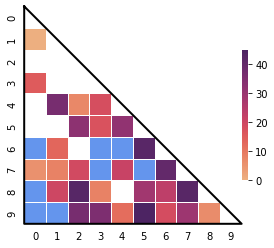

In [83]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

N = 10
data = np.random.uniform(0, 45, size=(N, N))
for x, y in np.random.randint(0, N, 50).reshape(-1, 2):
    data[x, y] = np.nan  # fill in some nans at random places
df = pd.DataFrame(data)
up_triang = np.triu(np.ones_like(data)).astype(bool)
ax = sns.heatmap(df, cmap='flare', xticklabels=True, yticklabels=True, square=True,
                 linecolor='white', linewidths=0.5,
                 cbar=True, mask=df.isnull() | up_triang, cbar_kws={'shrink': 0.6, 'pad': 0}, vmin=0, vmax=45)

data_special = np.random.randint(0, 5, size=(N, N)) // 4
sns.heatmap(data_special, cmap=ListedColormap(['cornflowerblue']), linecolor='white', linewidths=0.5,
            square=True, cbar=False, mask=(data_special != 1) | up_triang, ax=ax)
ax.plot([0, N, 0, 0], [0, N, N, 0], clip_on=False, color='black', lw=2)
ax.tick_params(left=False, bottom=False)
plt.show()